In [1]:
library(reshape2)
library(ggplot2)
library(dplyr)
library(plotly)
library(ggrepel)
library(shiny)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout



In [30]:
term.counts <- read.csv("term_freqs.csv", header = TRUE)

In [33]:
term.counts$sentiment.score <- term.counts$score

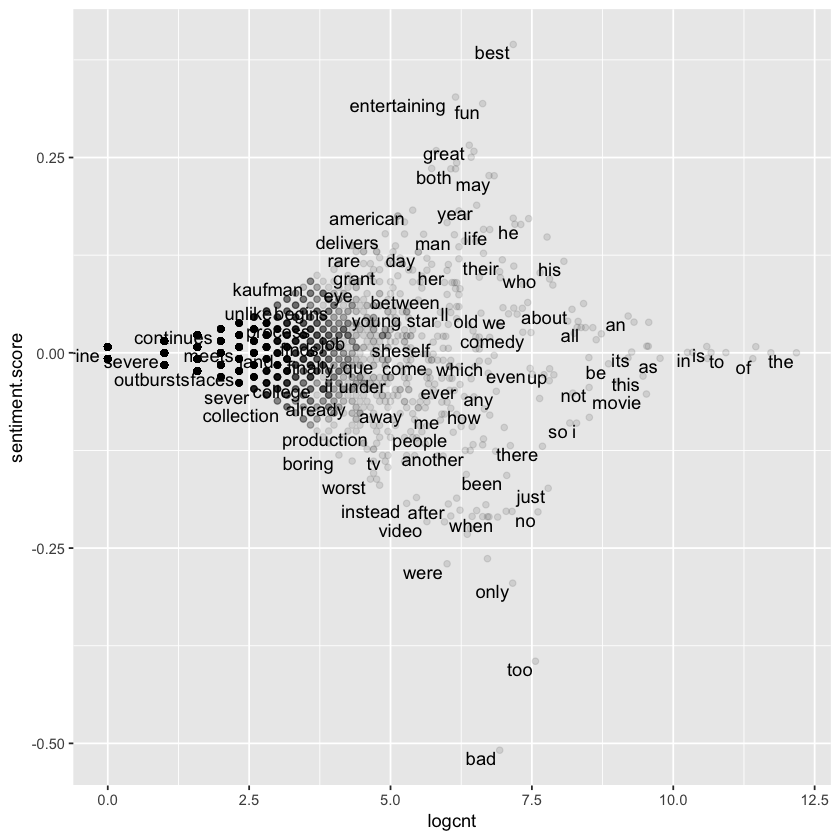

In [41]:
(term.counts %>% 
 ggplot(data=., mapping=aes(x=logcnt, 
                            y=sentiment.score, 
                            label=term)) 
 + geom_point(alpha=.1)
 + geom_text(hjust=1.1, vjust=1.1, 
             check_overlap = TRUE) 
)

Warning message:
“Transformation introduced infinite values in continuous x-axis”

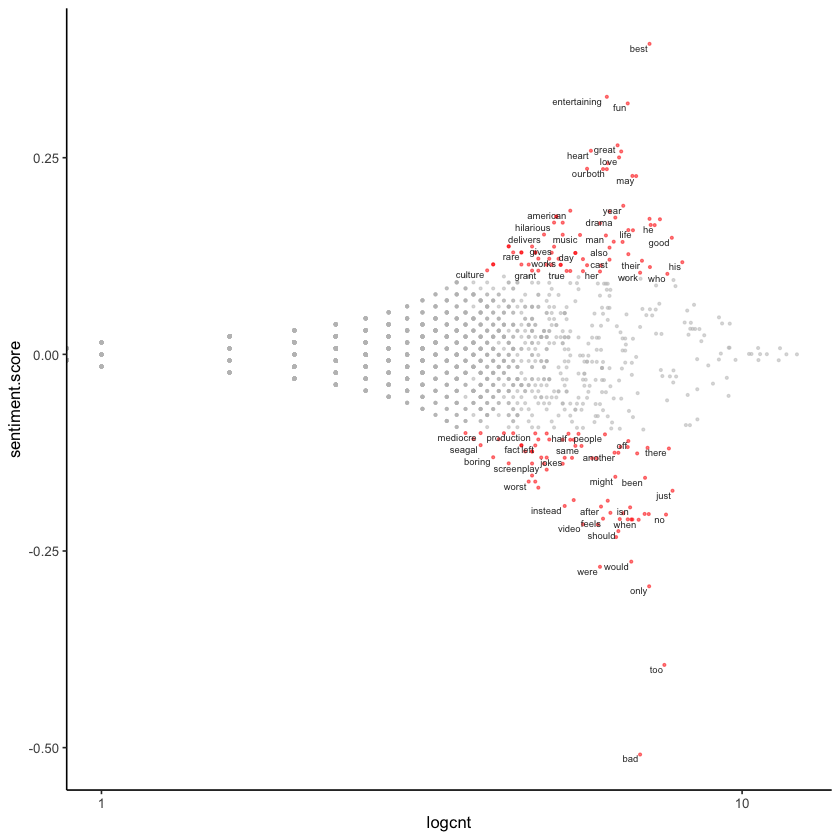

In [40]:
nice.plot <- (term.counts %>% ggplot(data=., 
                        mapping=aes(x=logcnt, 
                                    y=sentiment.score, 
                                    label=term,
                                    color=(abs(sentiment.score) > .1)),)
 + scale_color_manual(values = c("grey", "red"))
 + scale_x_log10()
 + geom_point(size=0.5, alpha=0.5)
 + geom_text(data=term.counts[term.counts$sentiment.score > .1,], 
             size=2,
             color = "grey20",
             check_overlap = TRUE,
             hjust=1.1, 
             vjust=1.1)
 + geom_text(data=term.counts[term.counts$sentiment.score < -.1,], 
             size=2,
             color = "grey20",
             check_overlap = TRUE,
             hjust=1.1, 
             vjust=1.1)
 + theme_classic(base_size = 10) 
 + theme(legend.position="none")
)
nice.plot

In [26]:
denserank <- function(x) {
    return(rank(unique(x))[match(x, unique(x))])
}

ERROR while rich displaying an object: Error in eval(expr, envir, enclos): object 'term' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(capture.output(print(obj)), collapse = "\n")
10. capture.output(print(obj))
11. evalVis(expr)
12. withVisible(eval(expr, pf))
13. eval(expr, pf)
14. eval(expr, envir, enclos)
15. print(obj)
16. print.ggplot(obj)
17. ggplot_build(x)
18. ggplot_build.g

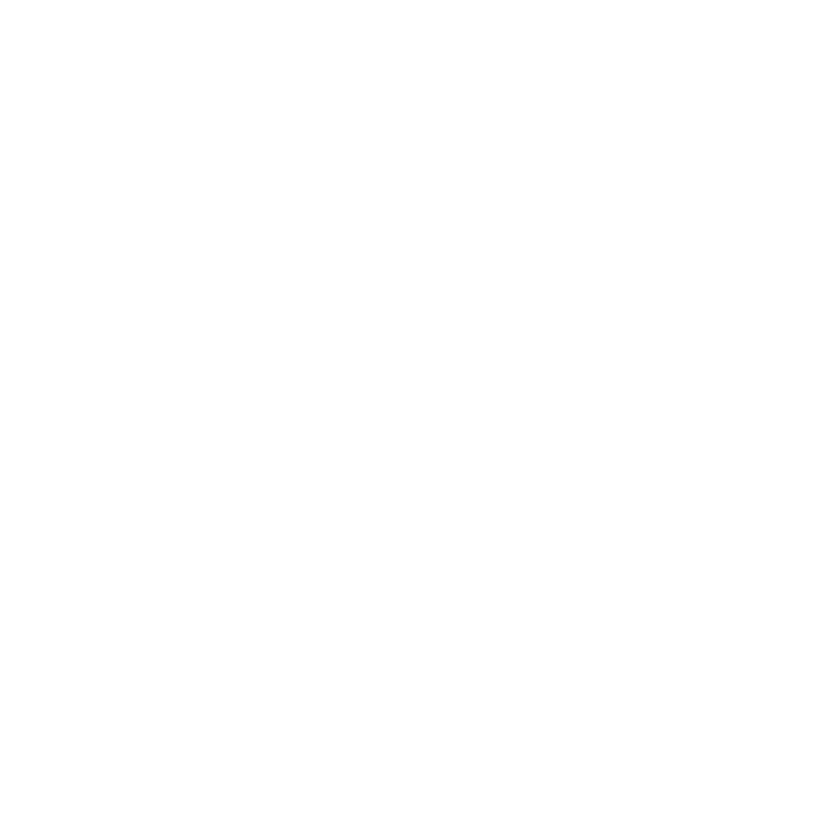

In [11]:
(term.counts %>% 
 ggplot(data=., mapping=aes(x=Positive.freq, y=Negative.freq, label=term)) 
 + geom_point(alpha=.1)
 + geom_text(hjust=1.1, vjust=1.1) 
)

ERROR while rich displaying an object: Error in eval(expr, envir, enclos): object 'Negative.rank' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(capture.output(print(obj)), collapse = "\n")
10. capture.output(print(obj))
11. evalVis(expr)
12. withVisible(eval(expr, pf))
13. eval(expr, pf)
14. eval(expr, envir, enclos)
15. print(obj)
16. print.ggplot(obj)
17. ggplot_build(x)
18. ggplo

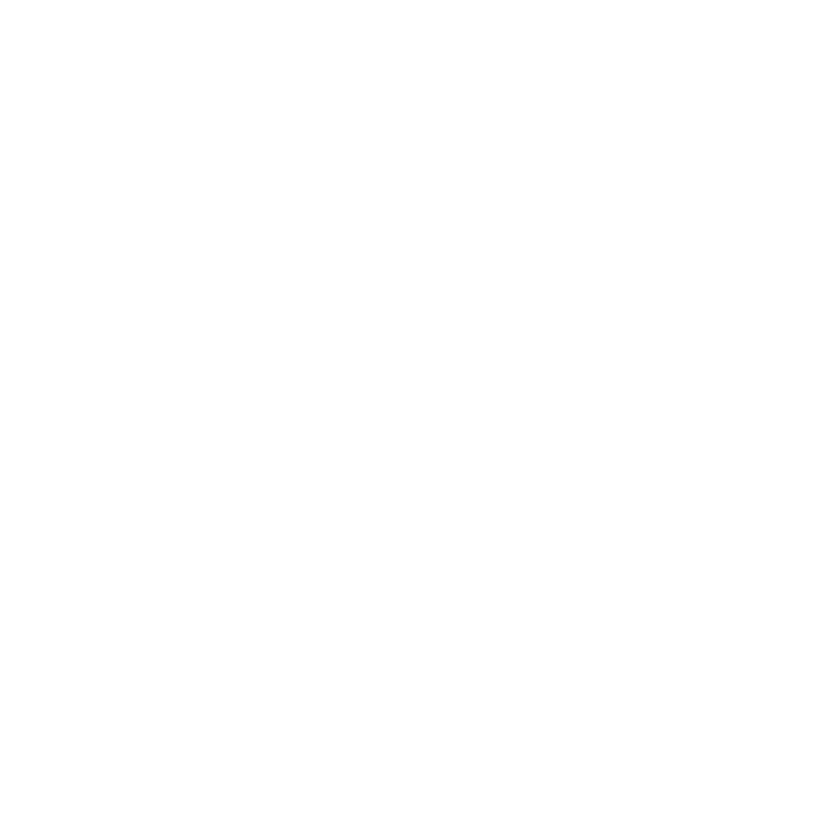

In [12]:
(term.counts %>% 
 ggplot(data=., mapping=aes(x=Positive.rank, y=Negative.rank, label=term)) 
 + geom_point(alpha=.1)
 + geom_text(hjust=1.1, vjust=1.1) 
)

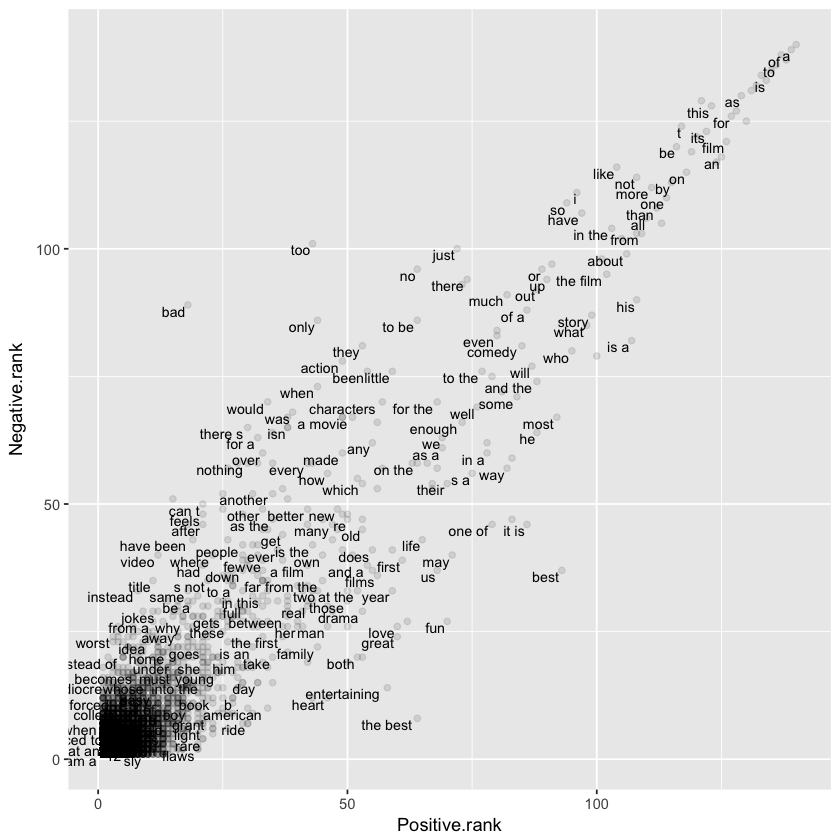

In [19]:
(term.counts %>% 
 ggplot(data=., mapping=aes(x=Positive.rank, y=Negative.rank, label=term)) 
 + geom_point(alpha=.1)
 + geom_text(hjust=1.1, vjust=1.1, check_overlap=TRUE, size=3) 
)

In [20]:
p_val = 0.01
z_cutoff <- qnorm(1 - p_val/2)
z_cutoff

[1] 2.575829

In [ ]:
(term.counts %>% ggplot(data=., mapping=aes(x=sum.freq, y=z.score, label=term)) 
 + scale_x_log10()
 + geom_point(alpha=.1)
)

In [ ]:
(term.counts %>% ggplot(data=., mapping=aes(x=sum.freq, y=z.score, label=term)) 
 + scale_x_log10()
 + geom_point(alpha=.1)
 + geom_text(hjust=1.1, 
             vjust=1.1) 
)

In [ ]:
(term.counts %>% ggplot(data=., mapping=aes(x=sum.freq, y=z.score, label=term)) 
 + scale_x_log10()
 + geom_point(alpha=.2)
 + geom_text(check_overlap = TRUE,
             hjust=1.1, 
             vjust=1.1) 
)

In [ ]:
(term.counts %>% ggplot(data=., mapping=aes(x=sum.freq, y=z.score, label=term)) 
 + scale_x_log10()
 + geom_point()
 + geom_text(data=filter(term.counts, abs(z.score)>z_cutoff), 
             check_overlap = TRUE,
             hjust=1.1,
             vjust=1.1) 
)

In [ ]:
(term.counts %>% ggplot(data=., mapping=aes(x=sum.freq, y=z.score, label=term)) 
 + scale_x_log10()
 + geom_point()
 + geom_text_repel(data=filter(term.counts, abs(z.score)>z_cutoff)) 
)

In [ ]:
(term.counts %>% ggplot(data=., 
                        mapping=aes(x=sum.freq, 
                                    y=z.score, 
                                    label=term,
                                    color=(abs(z.score) > z_cutoff)),)
 + scale_color_manual(values = c("grey", "red"))
 + scale_x_log10()
 + scale_y_continuous(limits=c(-10, 10))
 + geom_point(size=0.5, alpha=0.5)
 + geom_text_repel(data=term.counts[term.counts$z.score > z_cutoff,], 
                   #mapping=aes(size=abs(z.score)),
                   ylim = c(z_cutoff, NA), 
                   color = "grey20",
                   size=2,
                   segment.size = 0.1,
                   point.padding = .1)
 + geom_text_repel(data=term.counts[term.counts$z.score < -z_cutoff,], 
                   #mapping=aes(size=abs(z.score)),
                   ylim = c(NA, -z_cutoff), 
                   color = "grey20",
                   size=2,
                   segment.size = 0.1,
                   point.padding = .1)
 + theme_classic(base_size = 10) 
 + theme(legend.position="none")
)

In [ ]:
nice.plot <- (term.counts %>% ggplot(data=., 
                        mapping=aes(x=sum.freq, 
                                    y=z.score, 
                                    label=term,
                                    color=(abs(z.score) > z_cutoff)),)
 + scale_color_manual(values = c("grey", "red"))
 + scale_x_log10()
 + geom_point(size=0.5, alpha=0.5)
 + geom_text(data=term.counts[term.counts$z.score > z_cutoff,], 
             size=1.5,
             color = "grey20",
             check_overlap = TRUE,
             hjust=1.1, 
             vjust=1.1)
 + geom_text(data=term.counts[term.counts$z.score < -z_cutoff,], 
             size=1.5,
             color = "grey20",
             check_overlap = TRUE,
             hjust=1.1, 
             vjust=1.1)
 + theme_classic(base_size = 10) 
 + theme(legend.position="none")
)
nice.plot

In [ ]:
#chart_link <- api_create(p, filename="geom_point/scatter")
#chart_link

In [ ]:
ui <- fluidPage(
  plotlyOutput("plot"),
  verbatimTextOutput("event")
)

server <- function(input, output) {

  output$plot <- renderPlotly({
    nice.plot
  })

  output$event <- renderPrint({
    d <- event_data("plotly_hover")
    if (is.null(d)) "Hover on a point!" else d
  })
}

shinyApp(ui, server)